<a href="https://colab.research.google.com/github/tensorbytes0202/Deep-learning/blob/main/Regularization(L1%2CL2)_Adi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X,y = make_moons(100,noise=0.25,random_state=2)

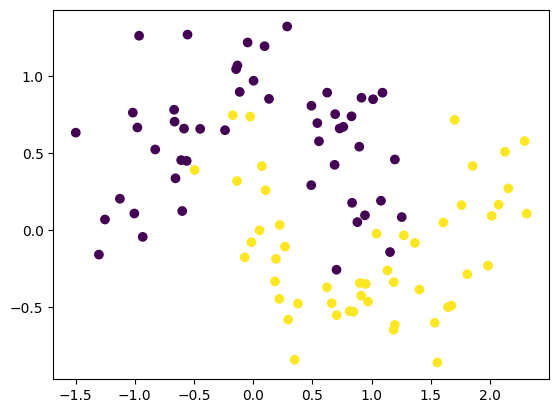

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [7]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history1 = model1.fit(X,y, epochs=2000,validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


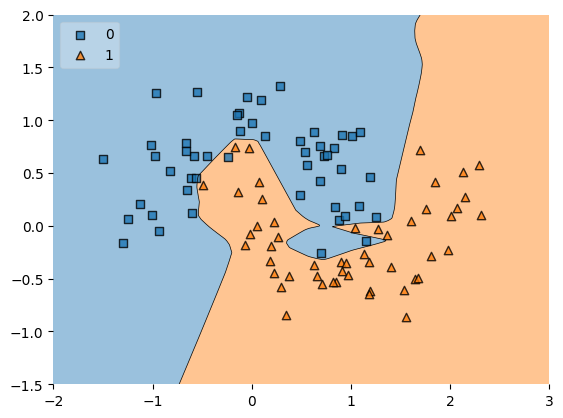

In [13]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

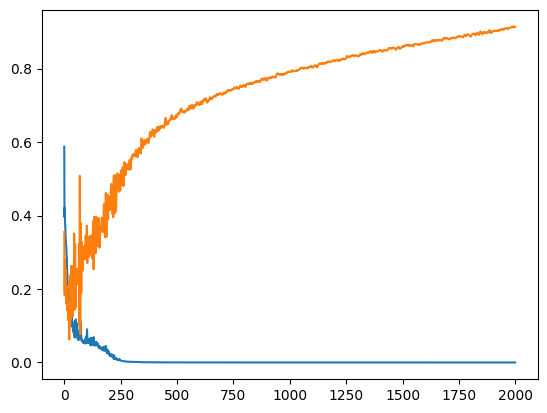

In [14]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])


In [16]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


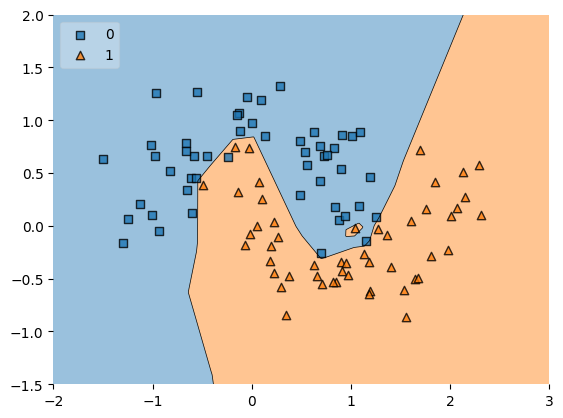

In [20]:
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

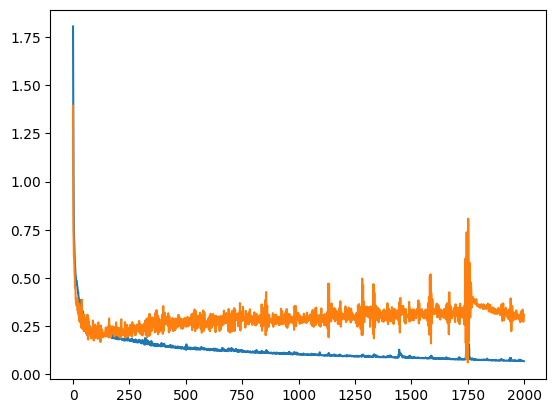

In [23]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [24]:
model1_weight_layer1  = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

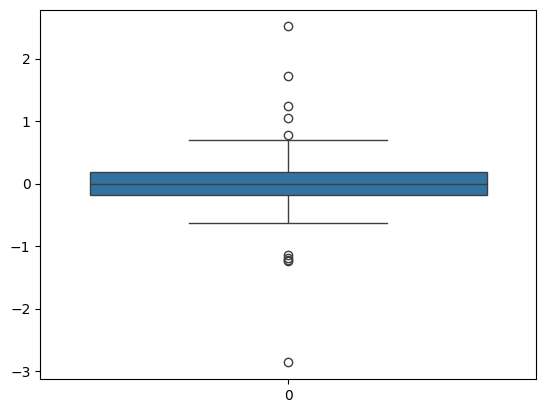

In [25]:
sns.boxplot(data=[model1_weight_layer1])

<Axes: >

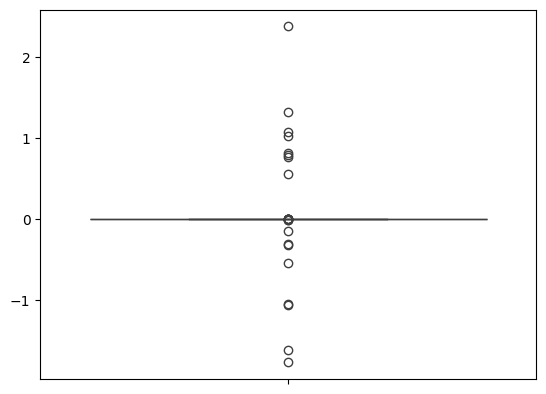

In [27]:
sns.boxplot(model2_weight_layer1)

In [28]:
model1_weight_layer1.min()

np.float32(-2.8634331)

In [29]:
model2_weight_layer1.min()


np.float32(-1.7613397)

/tmp/ipython-input-2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/tmp/ipython-input-2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

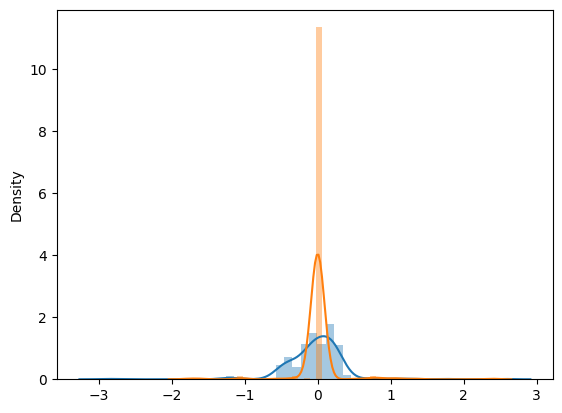

In [30]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [31]:
model1.get_weights()[0].reshape(256)

array([ 6.06322326e-02,  3.18585336e-02, -4.20481652e-01, -1.12990141e-02,
       -2.08896577e-01,  1.82649687e-01, -6.24583483e-01,  1.98195815e-01,
        3.80592585e-01,  6.70379773e-02, -2.01649234e-01,  1.36357874e-01,
        8.18277001e-02,  3.52509141e-01,  2.51310199e-01, -4.38767672e-01,
       -1.65850773e-01, -3.24246287e-02,  2.24324673e-01, -1.86135069e-01,
       -2.77343601e-01,  2.45800734e-01,  2.01188415e-01,  1.68214262e-01,
        2.28605941e-01,  2.79614300e-01, -3.76651555e-01, -2.11743176e-01,
        4.14646804e-01, -4.28272039e-01,  7.66188726e-02, -2.22753122e-01,
       -4.73858356e-01, -3.08671862e-01, -7.53388274e-04,  1.25076681e-01,
       -3.43004584e-01, -1.87421944e-02,  2.60717899e-01, -3.24259698e-01,
       -4.53339368e-01,  2.11872682e-01, -5.61910987e-01,  2.46477276e-01,
       -4.64642555e-01,  9.94352326e-02,  9.19098109e-02, -2.16642302e-02,
        6.93651214e-02, -4.81783867e-01,  3.33490670e-02,  1.23119406e-01,
       -5.37373960e-01, -